<a href="https://colab.research.google.com/github/dslidder/SMARTSign/blob/main/SmartSignProject_AndrewBonilla_Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile
import random
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download grassknoted/asl-alphabet

!unzip asl-alphabet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 1.02G/1.03G [00:04<00:00, 240MB/s]
100% 1.03G/1.03G [00:04<00:00, 239MB/s]
Archive:  asl-alphabet.zip
replace asl_alphabet_test/asl_alphabet_test/A_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/B_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/C_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/D_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/E_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/F_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/G_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/H_test.jpg? [y]es,

In [ ]:
! rm -rf asl-alphabet.zip
# just removing the asl-alphabet zip file, not sure why it is still here despite me having unzipped it, so I hope this isn't a bad idea

In [ ]:
try:
    os.mkdir('/tmp/asldata')
    os.mkdir('/tmp/asldata/train')
    os.mkdir('/tmp/asldata/test')
    #os.mkdir('/tmp/asldata/train/cats')
    #os.mkdir('/tmp/cats-and-dogs/train/dogs')
    #os.mkdir('/tmp/cats-and-dogs/test/cats')
    #os.mkdir('/tmp/cats-and-dogs/test/dogs')
except OSError:
    pass

In [ ]:
try:
    os.mkdir('/tmp/asldata/train/A')
    os.mkdir('/tmp/asldata/train/B')
    os.mkdir('/tmp/asldata/train/C')
    os.mkdir('/tmp/asldata/train/D')
    os.mkdir('/tmp/asldata/train/E')
    os.mkdir('/tmp/asldata/train/F')
    os.mkdir('/tmp/asldata/train/G')
    os.mkdir('/tmp/asldata/train/H')
    os.mkdir('/tmp/asldata/train/I')
    os.mkdir('/tmp/asldata/train/J')
    os.mkdir('/tmp/asldata/train/K')
    os.mkdir('/tmp/asldata/train/L')
    os.mkdir('/tmp/asldata/train/M')
    os.mkdir('/tmp/asldata/train/N')
    os.mkdir('/tmp/asldata/train/O')
    os.mkdir('/tmp/asldata/train/P')
    os.mkdir('/tmp/asldata/train/Q')
    os.mkdir('/tmp/asldata/train/R')
    os.mkdir('/tmp/asldata/train/S')
    os.mkdir('/tmp/asldata/train/T')
    os.mkdir('/tmp/asldata/train/U')
    os.mkdir('/tmp/asldata/train/V')
    os.mkdir('/tmp/asldata/train/W')
    os.mkdir('/tmp/asldata/train/X')
    os.mkdir('/tmp/asldata/train/Y')
    os.mkdir('/tmp/asldata/train/Z')
    os.mkdir('/tmp/asldata/train/space')
    os.mkdir('/tmp/asldata/train/nothing')
except OSError:
  pass

In [ ]:
try:
    os.mkdir('/tmp/asldata/test/A')
    os.mkdir('/tmp/asldata/test/B')
    os.mkdir('/tmp/asldata/test/C')
    os.mkdir('/tmp/asldata/test/D')
    os.mkdir('/tmp/asldata/test/E')
    os.mkdir('/tmp/asldata/test/F')
    os.mkdir('/tmp/asldata/test/G')
    os.mkdir('/tmp/asldata/test/H')
    os.mkdir('/tmp/asldata/test/I')
    os.mkdir('/tmp/asldata/test/J')
    os.mkdir('/tmp/asldata/test/K')
    os.mkdir('/tmp/asldata/test/L')
    os.mkdir('/tmp/asldata/test/M')
    os.mkdir('/tmp/asldata/test/N')
    os.mkdir('/tmp/asldata/test/O')
    os.mkdir('/tmp/asldata/test/P')
    os.mkdir('/tmp/asldata/test/Q')
    os.mkdir('/tmp/asldata/test/R')
    os.mkdir('/tmp/asldata/test/S')
    os.mkdir('/tmp/asldata/test/T')
    os.mkdir('/tmp/asldata/test/U')
    os.mkdir('/tmp/asldata/test/V')
    os.mkdir('/tmp/asldata/test/W')
    os.mkdir('/tmp/asldata/test/X')
    os.mkdir('/tmp/asldata/test/Y')
    os.mkdir('/tmp/asldata/test/Z')
    os.mkdir('/tmp/asldata/test/space')
    os.mkdir('/tmp/asldata/test/nothing')
except OSError:
  pass

In [ ]:
for filename in os.listdir("/tmp/asldata/test/Y"): # So the test files themselves are here
  print(filename)

In [ ]:
! rm -rf asl_alphabet_train/asl_alphabet_train/del
# idk what this folder is so i deleted it

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
      for image in os.listdir(SOURCE + filename):
        file = SOURCE + filename + "/" + image
        if os.path.getsize(file) > 0:
            files.append(filename + "/" + image)
        else:
            print(image + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


Source_DIR = "asl_alphabet_train/asl_alphabet_train/"
Training_DIR = "/tmp/asldata/train/"
Testing_DIR = "/tmp/asldata/test/"

split_size = .9
split_data(Source_DIR, Training_DIR, Testing_DIR, split_size)

In [ ]:
for filename in os.listdir("/tmp/asldata/test/Y"): # So the test files themselves are here
  print(filename)

In [ ]:
base_dir = '/tmp/asldata'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
#train_A_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
#train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
#validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
#validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(112, 112),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(112, 112),
        batch_size=20,
        class_mode='categorical')

Found 75601 images belonging to 28 classes.
Found 8400 images belonging to 28 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(112, 112, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(138, activation='relu'),
  tf.keras.layers.Dense(28, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=validation_generator,steps_per_epoch=100,validation_steps=50,verbose=1)

Epoch 1/20
100/100 [==============================] - 5s 43ms/step - loss: 3.3482 - accuracy: 0.0625 - val_loss: 3.1123 - val_accuracy: 0.1660
Epoch 2/20
100/100 [==============================] - 4s 41ms/step - loss: 2.7917 - accuracy: 0.2100 - val_loss: 2.5665 - val_accuracy: 0.2390
Epoch 3/20
100/100 [==============================] - 4s 40ms/step - loss: 2.3197 - accuracy: 0.3300 - val_loss: 2.1028 - val_accuracy: 0.3480
Epoch 4/20
100/100 [==============================] - 4s 41ms/step - loss: 2.0181 - accuracy: 0.3985 - val_loss: 1.8756 - val_accuracy: 0.4170
Epoch 5/20
100/100 [==============================] - 4s 40ms/step - loss: 1.7113 - accuracy: 0.4775 - val_loss: 1.6724 - val_accuracy: 0.4760
Epoch 6/20
100/100 [==============================] - 4s 41ms/step - loss: 1.4734 - accuracy: 0.5525 - val_loss: 1.3704 - val_accuracy: 0.5940
Epoch 7/20
100/100 [==============================] - 4s 41ms/step - loss: 1.2715 - accuracy: 0.6045 - val_loss: 1.0857 - val_accuracy: 0.6620

Text(0.5, 1.0, 'Training and validation loss')

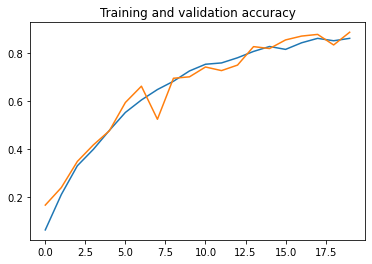

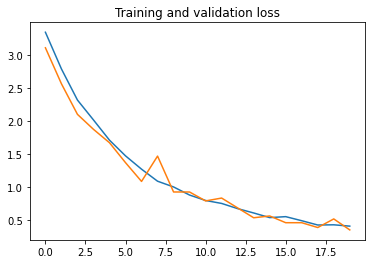

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')